In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data = pd.read_csv('heart.csv')

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
data.shape

(1025, 14)

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<Axes: xlabel='target', ylabel='count'>

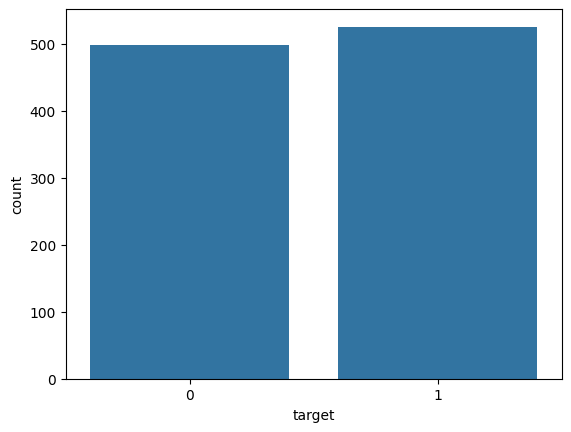

In [10]:
sns.countplot(x='target', data=data)

<Axes: xlabel='target', ylabel='count'>

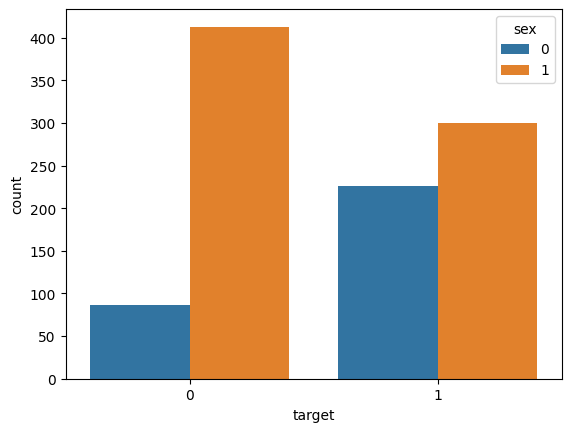

In [11]:
sns.countplot(x='target', hue='sex', data=data)   # 1-male, 0-female

array([[<Axes: title={'center': 'age'}>]], dtype=object)

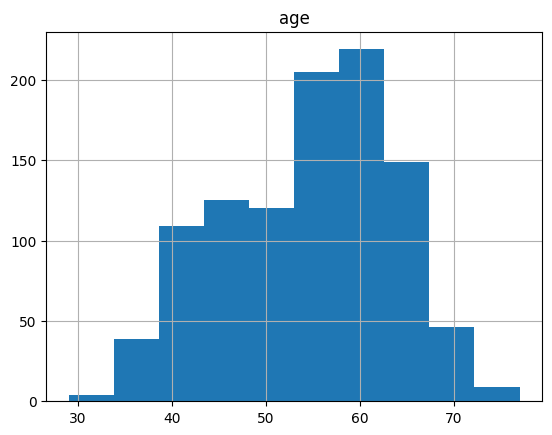

In [12]:
data.hist('age')

In [15]:
# shuffle data
data = data.sample(frac=1)
data = data.reset_index(drop=True)  # reet index after shuffling

In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
1,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
2,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0


In [17]:
X = data.drop('target', axis=1) # use all columns except 'target' as features
Y = data['target']

In [19]:
print(X.shape)
print(Y.shape)

(1025, 13)
(1025,)


In [20]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,57,1,0,130,131,0,1,115,1,1.2,1,1,3
1,46,0,1,105,204,0,1,172,0,0.0,2,0,2
2,55,0,0,180,327,0,2,117,1,3.4,1,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,63,0,0,150,407,0,0,154,0,4.0,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,66,1,0,120,302,0,0,151,0,0.4,1,0,2
1021,51,1,2,100,222,0,1,143,1,1.2,1,0,2
1022,44,1,1,120,220,0,1,170,0,0.0,2,0,2
1023,52,1,0,112,230,0,1,160,0,0.0,2,1,2


In [21]:
Y

0       0
1       1
2       0
3       1
4       0
       ..
1020    1
1021    1
1022    1
1023    0
1024    1
Name: target, Length: 1025, dtype: int64

In [22]:
# split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=2)
# stratify will use even amount of different targets

In [25]:
X_train.shape,  X_test.shape

((768, 13), (257, 13))

**Logistic Regression**

In [34]:
# use Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [35]:
# train the model
log_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# checking the accuracy on training data
Train_pred = log_model.predict(X_train)

from sklearn.metrics import accuracy_score
train_acc = accuracy_score(Y_train, Train_pred)
print("Accuracy on training data = ", train_acc)

Accuracy on training data =  0.8372395833333334


In [45]:
# predict test data
predictions = log_model.predict(X_test)

In [46]:
# evaluate the model

accuracy_score(Y_test, predictions)

0.8443579766536965

In [51]:
# build a prediction for user input
input_data = (34,0,1,118,210,0,1,192,0,0.7,2,0,2)
input_arr = np.asarray(input_data)

#reshape the array to predict only one instance
input_reshaped = input_arr.reshape(1,-1)

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# predict
prediction = model.predict(input_reshaped)

if prediction == [1]:
  print('Heart Disease - Yes')
else:
  print('Heart Disease - No')

Heart Disease - Yes


In [52]:
# save model
import joblib

file_path = 'logistic_regression_model.pkl'

# Save the model to the file path
joblib.dump(log_model, file_path)

print("Model saved successfully!")

Model saved successfully!


In [41]:
# use of cross validation technique
from sklearn.model_selection import cross_val_score
log_model_cv = LogisticRegression()

In [ ]:
# cross validation with 5 folds
cv_scores = cross_val_score(log_model_cv, X_train, Y_train, cv=5)

In [44]:
# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.88311688 0.82467532 0.81168831 0.81045752 0.83660131]
Mean CV score: 0.8333078686019861
